# Analiza składowych głównych (PCA, *ang Principal Component Analysis*)

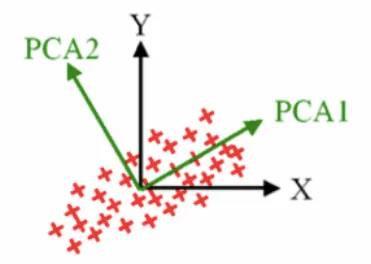

## Przykład: MNIST

Popatrzmy na działanie algorytmu PCA na danych ze zbioru MNIST. Zbiór MNIST można pobrać z wielu miejsc. Jest m.in. dostępny w bibliotece `keras` (module biblioteki `tensorflow`).

In [3]:
# !pip install tensorflow
from keras.datasets import mnist

2023-07-15 09:29:42.575012: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-15 09:29:43.991153: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-15 09:29:43.991221: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-15 09:29:48.786246: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

### Eksploracja danych

In [79]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train: ' + str(X_train.shape))
print('y_train: ' + str(y_train.shape))
print('X_test:  ' + str(X_test.shape))
print('y_test:  ' + str(y_test.shape))

X_train: (60000, 28, 28)
y_train: (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


Wyświetlmy kilka przykładowych obrazów, żeby zapoznać się z MNISTem

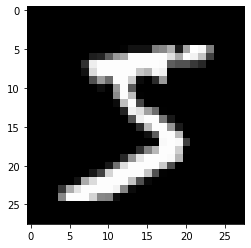

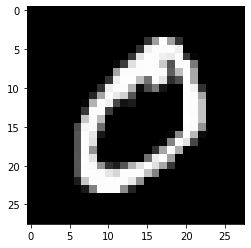

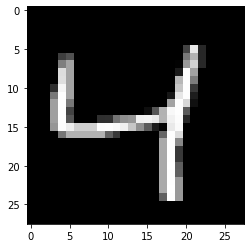

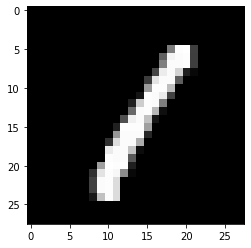

In [71]:
import matplotlib.pyplot as plt

for i in range(4):
    
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.show()

Popatrzmy na pojedynczy obrazek

In [73]:
single_image = X_train[0]

pd.set_option('display.max_columns', 28)
pd.DataFrame(single_image)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


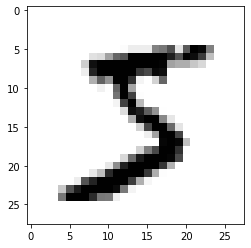

In [74]:
plt.imshow(single_image, cmap='gray_r');

Popatrzmy na etykiety


In [75]:
print(y_train)  # lista 60000 wartości

[5 0 4 ... 5 6 8]


### Przetwarzanie danych

**Ok, zacznijmy przetwarzanie.** Po pierwsze popatrzmy jeszcze raz na wymiar naszych danych. 

In [80]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Należy zmienić kształt obrazka tak, żeby był jednowymiarowym sygnałem (z 784 cechami). Dla modelu nie ma znaczenia jaki rozstawimy wartości. Model będzie po prostu szukał wzorców w sygnale, niezależnie od tego w jaki sposób ten sygnał będzie interpretowany.

In [81]:
import numpy as np

# Reshape the 28x28 pixel images into a single 784x1 pixel vector using .reshape
X_train = np.reshape(X_train, (len(X_train), -1)) / 255
X_test = np.reshape(X_test, (len(X_test), -1)) / 255

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [85]:
X_train[0].shape  # tym razem mamy wektor!

(784,)

Po drugie w PCA zawsze trzeba pracować z ustandaryzowanymi danymi w przeciwnym razie cecha, która ma największe wartości będzie miała dominujący wpływ.

In [86]:
from sklearn.preprocessing import StandardScaler

scaled_X_train = StandardScaler().fit_transform(X_train)

### Algorytm PCA

**Znajdźmy składowe główne**

In [87]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(scaled_X_train)
X_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
        -5.04552115e-15,  6.39858938e-15, -1.40753695e-16],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
        -5.36993908e-15,  2.04371569e-16, -2.54996964e-15],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         2.26600359e-18, -1.37315926e-17, -2.38518744e-17],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
        -1.91075883e-17, -4.90607674e-17, -1.75892545e-17],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         7.51401229e-18, -1.31430248e-17,  2.45257766e-18]])

**Ile mamy składowych głównych?** Odpowiedź: 784, tyle co cech. Póki co nie robimy żadnej redukcji.

In [88]:
X_pca.shape

(60000, 784)

Popatrzmy jaką część zmienności tłumaczą poszczególne składowe główne

In [89]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([5.64671692e-02, 4.07827199e-02, 3.73938042e-02, 2.88511485e-02,
       2.52110863e-02, 2.19426996e-02, 1.92334439e-02, 1.74579923e-02,
       1.53509230e-02, 1.40171960e-02, 1.34174302e-02, 1.20374194e-02,
       1.11456955e-02, 1.08992356e-02, 1.02864922e-02, 9.94486564e-03,
       9.36383280e-03, 9.21045666e-03, 8.93436778e-03, 8.69912619e-03,
       8.27363019e-03, 8.03417369e-03, 7.64845500e-03, 7.41772464e-03,
       7.15292868e-03, 6.91846831e-03, 6.84135964e-03, 6.56674546e-03,
       6.31676724e-03, 6.12919839e-03, 5.96255295e-03, 5.87716416e-03,
       5.71591699e-03, 5.62307416e-03, 5.54682002e-03, 5.38418374e-03,
       5.31182250e-03, 5.19605602e-03, 5.08211255e-03, 4.80005571e-03,
       4.76455820e-03, 4.69139360e-03, 4.54348956e-03, 4.51345787e-03,
       4.46963401e-03, 4.43383155e-03, 4.38215469e-03, 4.30381751e-03,
       4.26877901e-03, 4.23647017e-03, 4.04696121e-03, 3.99447403e-03,
       3.97456119e-03, 3.93820800e-03, 3.85813590e-03, 3.79042674e-03,
      

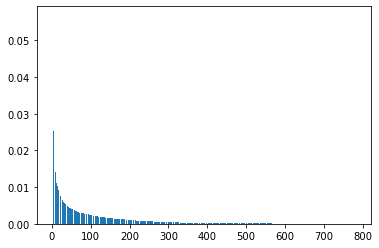

In [90]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

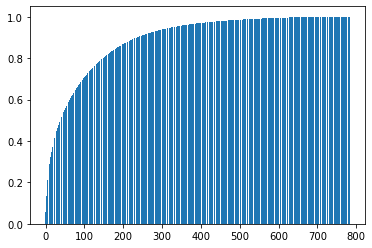

In [91]:
# kumulanta
plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

### PCA - redukcja wymiarowości

Klasa PCA przyjmuje opcjonalny parametr `n_components`. `n_components` oznacza:
* jeżeli `n_components > 1`, liczbę składowych głównych jaką chcemy uwzględnić (zaczynając od tej, która tłumaczy najwięcej zmienności, a potem schodząc w dół)
* jeżelie `0 < n_component < 1`, jaką część zmienności sygnału chcemy zachować (w tym przypadku uwzględnionych zostanie tyle składowych głównych, żeby spełniony był warunek)

Dobierzmy tak parametr `n_components`, żeby otrzymać tylko tyle składowych głównych ile potrzeba, żeby zachować 85% zmienności sygnału. 

In [92]:
pca = PCA(n_components=0.85)

X_pca = pca.fit_transform(scaled_X_train)
X_pca

array([[-9.22158806e-01, -4.81479035e+00,  6.75598364e-02, ...,
         2.76799832e-01,  2.52968430e-01, -4.30120958e-01],
       [ 8.70897698e+00, -7.75440302e+00, -3.44791044e+00, ...,
        -5.56854429e-01,  9.32616438e-01,  1.36548638e-01],
       [ 2.32838932e+00,  9.43133817e+00, -6.18411405e+00, ...,
         8.41963110e-01, -2.16324075e+00, -2.65064467e+00],
       ...,
       [-3.77721201e+00, -3.23056436e+00, -3.80619883e+00, ...,
         8.61622418e-01, -5.64109485e-01, -7.24422995e-01],
       [ 1.72236917e+00, -4.94812525e+00,  6.95122764e-03, ...,
         8.23470642e-01, -4.35217245e-01,  3.26716709e-02],
       [-1.42725062e+00, -6.17538558e+00, -2.96768709e+00, ...,
         9.57927771e-01, -2.19096246e+00, -8.91056651e-01]])

In [113]:
X_pca.shape

-2.3506885327151394e-10

Po wykonaniu PCA mamy zachowane 85% wariancji, przy redukcji z 784 wymiarów do 185 wymiarów. 185 składowych głównych tłumaczy 85% zmienności sygnału.

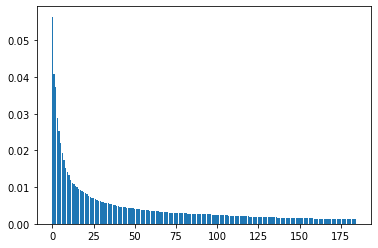

In [94]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

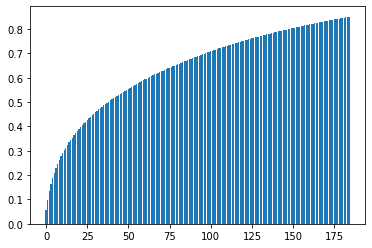

In [95]:
# kumulanta
plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

Zobaczmy jak teraz wyglądają nasze próbki.

In [96]:
reduced = pca.inverse_transform(pca.fit_transform(X_train))  # nieznozmalizowane, oryginalne obrazki!

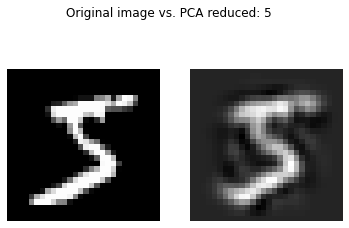

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.matshow(X_train[0].reshape(28,28), cmap='gray')
ax2.matshow(reduced[0].reshape(28,28), cmap='gray')

ax1.set_axis_off()
ax2.set_axis_off()
fig.suptitle(f"Original image vs. PCA reduced: {y_train[0]}")
plt.show()

### PCA - wizualizacji danych

Teraz spróbujmy jeszcze użyć PCA do wizualizacji danych (czyli musimy zredukować wymiary do 2, ewentualnie 3 lub 1) tak ,żeby można było wynik nanieść na wykres.

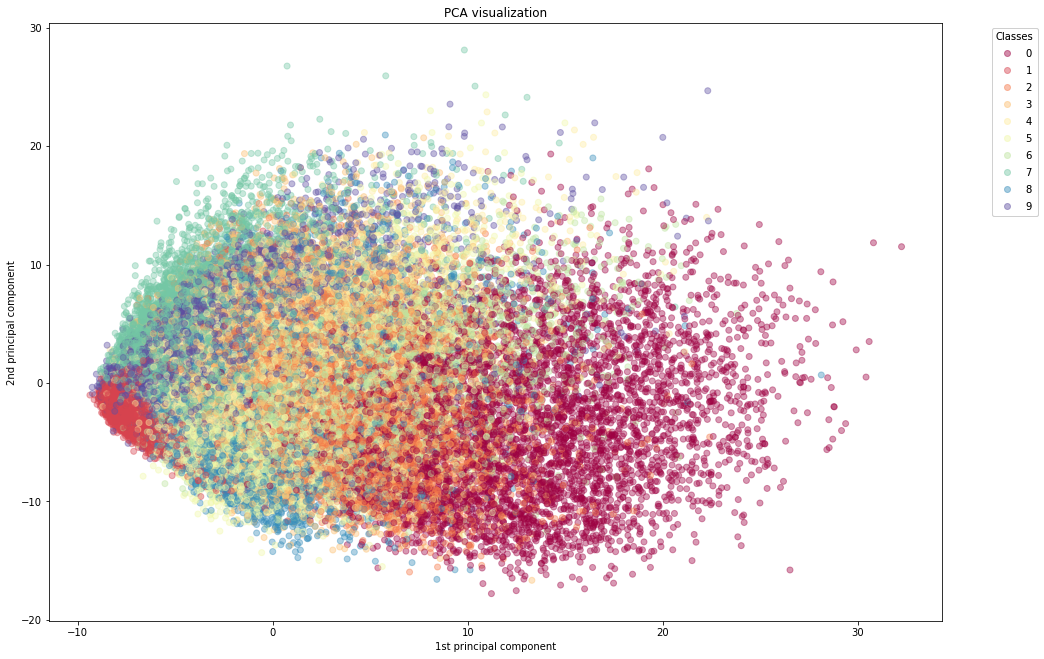

CPU times: user 13.9 s, sys: 1.72 s, total: 15.6 s
Wall time: 3.27 s


In [116]:
%%time

pca = PCA(n_components=2)  # redukujemy do dwóch wymiarów
pca_results = pca.fit_transform(scaled_X_train)

# create the scatter plot
fig, ax = plt.subplots(figsize=(16,11))

scatter = ax.scatter(
    x=pca_results[:, 0], 
    y=pca_results[:, 1], 
    c=y_train, 
    cmap=plt.cm.get_cmap('Spectral'), 
    alpha=0.4)

# produce a legend with the colors from the scatter
legend = ax.legend(*scatter.legend_elements(), title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left',)
ax.add_artist(legend)

ax.set_title("PCA visualization")
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.show()

In [117]:
explained_variance = pca.explained_variance_ratio_
explained_variance  # wytłumaczalność niecałych 10% oryginalnego sygnału ...

array([0.05646717, 0.04078272])

Ciężko byłoby na takim zbiorze wytyczyć krzywą decyzyjną. Jak widać nie po to uruchamiamy **PCA**, żeby polepszyć separowalność danych. Gdybyśmy chcieli zachować jak nalepszą separowalność danych zamiast **PCA** lepiej jest użyć metody **t-SNE** lub **UMAP**.

## Przykład: Iris dataset

Zbiór *Iris dataset* znajduje się pod adresem https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data i przedstawia pomiary płatków wykonane na trzech gatunków irysów.

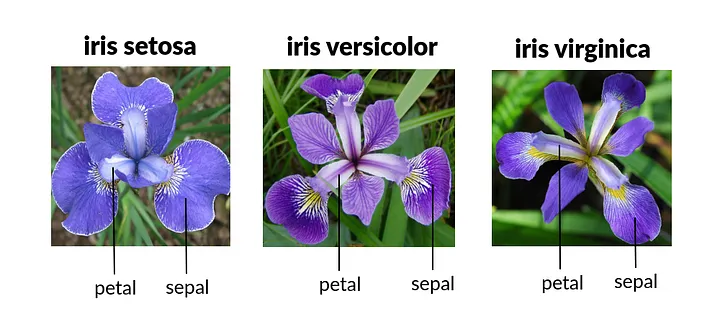

Mierzone był wymiary dwóch płatków oraz zbierana informacja o tym jakiego gatunku dotyczy pomiar.

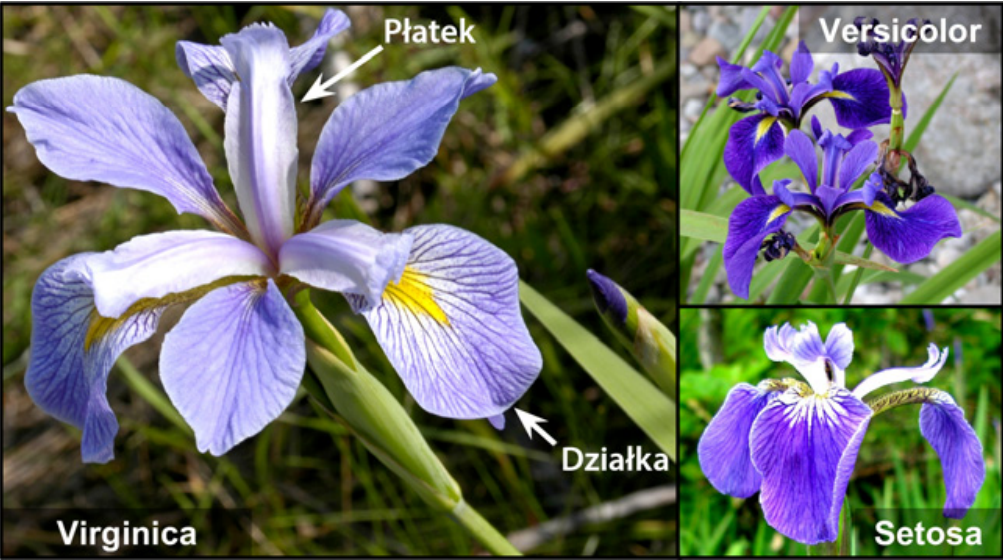

### Eksploracja danych

**Uwaga!** Zbiór zawiera wyłącznie pomiary. Nie działamy już na obrazach.

In [118]:
import pandas as pd
import sklearn

In [119]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Mamy czetry wymiary i 150 próbek. Ustandaryzujmy pomiary.

In [120]:
from sklearn.preprocessing import StandardScaler

variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

X = df.loc[:, variables].values
y = df.loc[:, ['target']]

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


### Analiza PCA

Są cztery cechy w danych wejściowych, zatem PCA obliczy nam taką samą liczbę składowych głównych.

In [121]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397


Popatrzmy ile wariancji tłumaczone jest przez kolejne składowe główne.

In [122]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

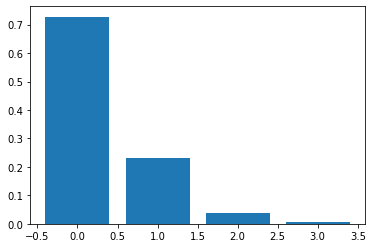

In [123]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

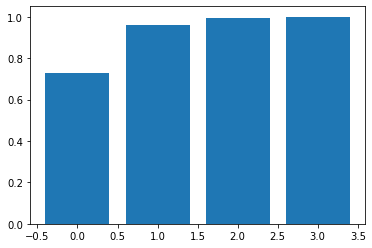

In [125]:
# kumulanta
plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

**Obserwacja:** Pierwsza składowa główna tłumaczy ponad 72% zmienności sygnału, druga 23%, trzecia 3.6%, a czwarta 0.51%.

Zatem 72.22% + 23.9% = 96.21% zmienności sygnału jest tłumaczone przez same, dwie pierwsze składowe główne.

In [126]:
X_pca['target'] = y
X_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'target']
X_pca.head()

,PC1,PC2,PC3,PC4,target
0,-2.264542,0.505704,-0.121943,-0.023073,Iris-setosa
1,-2.086426,-0.655405,-0.227251,-0.103208,Iris-setosa
2,-2.367950,-0.318477,0.051480,-0.027825,Iris-setosa
3,-2.304197,-0.575368,0.098860,0.066311,Iris-setosa
4,-2.388777,0.674767,0.021428,0.037397,Iris-setosa


Patrząc na stopień objaśnienia wariancji przez pierwsze dwie składowe główne prawdopodbna jest teza, że do reprezentacji sygnału wystarczą nam te dwie składowe.

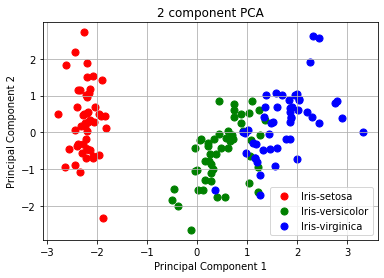

In [134]:
# The outcome shows the data are separable in the new space.
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    
    indicesToKeep = X_pca['target'] == target  # podział danych względem kolorów
    
    ax.scatter(
        X_pca.loc[indicesToKeep, 'PC1'], 
        X_pca.loc[indicesToKeep, 'PC2'], 
        c = color, 
        s = 50
    )

ax.legend(targets)
ax.grid()

Widzimy, że dodatkowo te dwie zmienne separują nam ładnie cały zbiór.

## Technikalia

**Ok, wszystko działa.** Ale w jaki sposób `sklearn` znajduje te składowe główne? Jaka matematyka jest pod spodem?

Metoda **PCA** wykorzystuje narzędzia dostarczane przez algebrę liniową. Do najważniejszych zagadnień wykorzystywanych w **PCA** należą: wektor, macierz, mnożenie macierzy, wyznacznik macierzy, rozkład (faktoryzacja) macierzy, SVD, wektory i wartości własne macierzy. Szczegółowo nie będziemy omawiali tych zagadnień, ale warto nakreślić intuicję matematyczną.

**W przypadku chęci pogłębienia wiedzy matematycznej materiałmi wartymi uwagi są:**

* [Czym są wektory ?](https://www.youtube.com/watch?v=2OGJvGAniRU)
* [3Blue1Brown Linear Algebra course](https://www.youtube.com/watch?v=kjBOesZCoqc&list=PL0-GT3co4r2y2YErbmuJw2L5tW4Ew2O5B)
* [Gilbert Strang - Matrix methods in Data Analysis, Signal Processing, and Machine Learning](https://www.youtube.com/watch?v=Cx5Z-OslNWE&list=PLUl4u3cNGP63oMNUHXqIUcrkS2PivhN3k)

## Zadania

### Zadanie 1: Gatunki ryb

W pliku `'../Dane/fish.csv'` znajdują się pomiary 158 ryb z siedmiu różnych gatunków. Wczytaj dane, popatrz na cechy (nawet patrząc po samych nazwach sprawiają wrażenie nadmiarowych). Przeprowadź analizę składowych głównych. Przedstaw dane na wykresie zachowując conajmniej 80% wariancji w danych.

In [223]:
data = pd.read_csv('../Dane/fish.csv', sep=';', decimal=',')
data

,Weight,Length1,Length2,Length3,Height,Width,Species
0,242.0,23.2,25.4,30.0,38.4,13.4,1
1,290.0,24.0,26.3,31.2,40.0,13.8,1
2,340.0,23.9,26.5,31.1,39.8,15.1,1
3,363.0,26.3,29.0,33.5,38.0,13.3,1
4,430.0,26.5,29.0,34.0,36.6,15.1,1
...,...,...,...,...,...,...,...
153,1100.0,39.0,42.0,44.6,28.7,15.4,7
154,1000.0,39.8,43.0,45.2,26.4,16.1,7
155,1100.0,40.1,43.0,45.5,27.5,16.3,7
156,1000.0,40.2,43.5,46.0,27.4,17.7,7


In [172]:
from sklearn.preprocessing import StandardScaler

X, y = data.drop(['Species'], axis=1), data['Species']

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5
0,-0.437761,-0.302868,-0.279397,-0.102465,1.226550,-0.316456
1,-0.303663,-0.222813,-0.195383,0.000982,1.420019,-0.140554
2,-0.163978,-0.232820,-0.176713,-0.007639,1.395835,0.431126
3,-0.099723,0.007347,0.056659,0.199256,1.178183,-0.360431
4,0.087455,0.027361,0.056659,0.242359,1.008898,0.431126


In [173]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2,3,4,5
0,-0.475544,-0.672771,-1.099416,0.297182,-0.026358,0.002149
1,-0.251357,-0.917353,-1.109778,0.280617,-0.034079,0.003290
2,-0.154613,-1.307458,-0.690451,0.183379,-0.052173,-0.013403
3,0.157962,-0.550368,-1.084849,0.256044,-0.016607,-0.018678
4,0.309765,-0.991671,-0.411595,0.131401,-0.089526,0.005765


In [174]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([6.49520614e-01, 2.41665373e-01, 9.13717229e-02, 1.69964368e-02,
       4.05610080e-04, 4.02429382e-05])

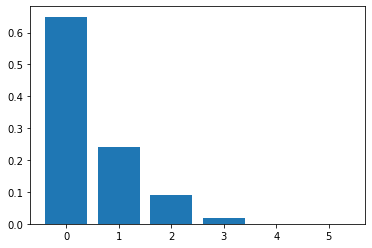

In [175]:
plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

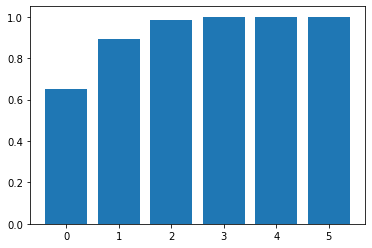

In [176]:
# kumulanta
plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

In [177]:
X_pca['Species'] = y
X_pca.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'Species']
X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Species
0,-0.475544,-0.672771,-1.099416,0.297182,-0.026358,0.002149,1
1,-0.251357,-0.917353,-1.109778,0.280617,-0.034079,0.003290,1
2,-0.154613,-1.307458,-0.690451,0.183379,-0.052173,-0.013403,1
3,0.157962,-0.550368,-1.084849,0.256044,-0.016607,-0.018678,1
4,0.309765,-0.991671,-0.411595,0.131401,-0.089526,0.005765,1


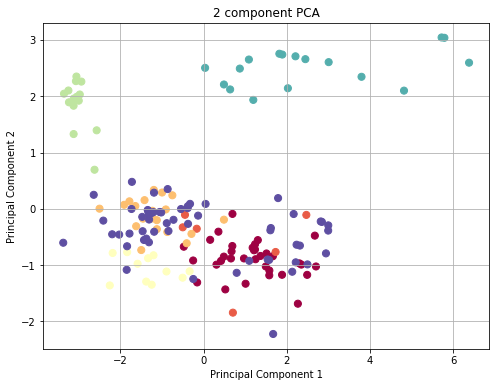

In [196]:
# wizualizacja separacji dla 80% zmienności (dwie składowe)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.grid()

ax.scatter(
        X_pca['PC1'], 
        X_pca['PC2'], 
        c = y,
        cmap=plt.cm.get_cmap('Spectral'),
        s = 50
    );

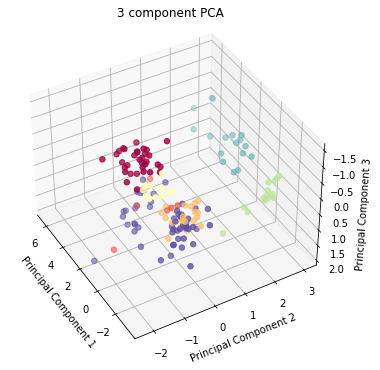

In [209]:
# a może dane separują się w 3D (ponad 90% zmienności)?

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.view_init(-140, 30)

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_zlabel('Principal Component 3')  
ax.set_title('3 component PCA') 
ax.grid()

ax.scatter(
        X_pca['PC1'], 
        X_pca['PC2'],
        X_pca['PC3'], 
        c = y,
        cmap=plt.cm.get_cmap('Spectral'),
        s=30
    );

### Zadanie 2: Zwyczaje żywieniowe

W pliku `'../Dane/food.txt'` znajdują się dane dotyczące zwyczajów żywieniowych w czterech krajach Wielkiej Brytanii - Anglii, Walii, Szkocji i Irlandii Północnej. Dane przedstawiają przypadające na jednego człowieka średnie, tygodniowe spożycie poszczególnych produktów spożywczych w gramach.

**Więcej o danych można poczytać tutaj:** http://www.dsc.ufcg.edu.br/~hmg/disciplinas/posgraduacao/rn-copin-2014.3/material/SignalProcPCA.pdf

In [411]:
data = pd.read_csv('../Dane/food.txt', sep= ' ', header=2)
data

,food,England,Wales,Scotland,Ireland
0,Cheese,105,103,103,66
1,Carcass-meat,245,227,242,267
2,Other-meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats-and-oils,193,235,184,209
5,Sugars,156,175,147,139
6,Fresh-potatoes,720,874,566,1033
7,Fresh-Veg,253,265,171,143
8,Other-Veg,488,570,418,355
9,Processed-potatoes,198,203,220,187


In [413]:
from sklearn.preprocessing import StandardScaler

X, y = data.drop(['food'], axis=1).T, data['food'].T

X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X, index=['England', 'Wales', 'Scotland', 'Ireland'], columns=y.values)
X

,Cheese,Carcass-meat,Other-meat,Fish,Fats-and-oils,Sugars,Fresh-potatoes,Fresh-Veg,Other-Veg,Processed-potatoes,Processed-Veg,Fresh-fruit,Cereals,Beverages,Soft-drinks,Alcoholic-drinks,Confectionery
England,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
Wales,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
Scotland,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
Ireland,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [414]:
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, index=['England', 'Wales', 'Scotland', 'Ireland'], columns=['PC1', 'PC2', 'PC3', 'PC4'])
X_pca  # tylko cztery składowe, ponieważ taka jest ranga (rank) macierzy danych (DataFrame)

,PC1,PC2,PC3,PC4
England,-0.954490,0.328318,1.829829,2.031442e-16
Wales,-4.520951,-1.735380,-0.781412,2.031442e-16
Scotland,0.487978,3.233672,-0.765148,2.031442e-16
Ireland,4.987462,-1.826611,-0.283270,2.031442e-16


[6.83278713e-01 2.48712884e-01 6.80084029e-02 2.42750388e-33]


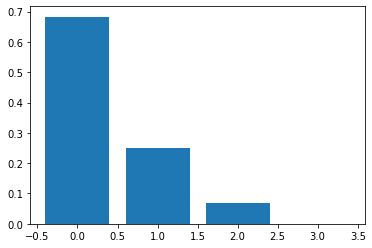

In [394]:
print(pca.explained_variance_ratio_)

plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

[0.68327871 0.9319916  1.         1.        ]


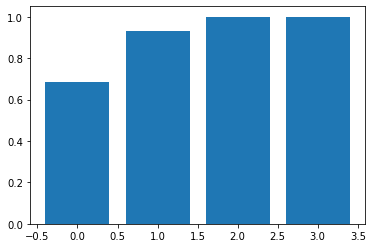

In [395]:
print(np.cumsum(pca.explained_variance_ratio_))

plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

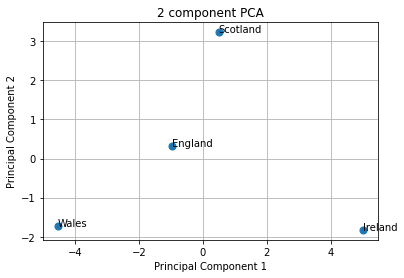

In [447]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.grid()

ax.scatter(
        X_pca['PC1'], 
        X_pca['PC2'], 
        s = 50
    );

for i, target in enumerate(X_pca.index):
    ax.annotate(target, (X_pca['PC1'].values[i], X_pca['PC2'].values[i]))

In [418]:
pca = PCA(n_components=1)

X_pca_r = pca.fit_transform(X)
X_pca_r = pd.DataFrame(X_pca_r, index=['England', 'Wales', 'Scotland', 'Ireland'], columns=['PC1'])

X_pca_r

,PC1
England,-0.954490
Wales,-4.520951
Scotland,0.487978
Ireland,4.987462


In [433]:
X_pca_r.values.ravel().shape
[0] * len(X_pca_r.values.ravel())
X_pca_r.values.ravel()

array([-0.95448984, -4.52095094,  0.48797835,  4.98746242])

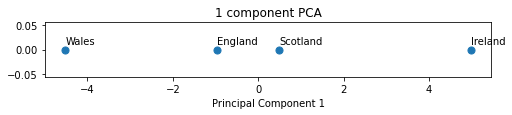

In [448]:
fig, ax = plt.subplots(figsize=(8, 1))

ax.set_xlabel('Principal Component 1') 
ax.set_title('1 component PCA') 

ax.scatter(
        X_pca_r.values.ravel(), 
        [0] * len(X_pca_r.values.ravel()), 
        s = 50
    );

for i, target in enumerate(X_pca_r.index):
    ax.annotate(target, (X_pca_r.values[i], 0.01))

### Zadanie 3 Charakterystyki miast

W pliku `'../Dane/cities.txt'` znajdują się dane dotyczące 46 miast świata. Zredukuj wymiary, nanieś dane na wykres, wskaż miasta, w których żyje się najlepiej.

In [403]:
df = pd.read_csv('../Dane/cities.txt', delimiter='\t+', engine='python')  # ewentualnie: on_bad_lines='skip'
df.head()

,Work,Price,Salary
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5


In [405]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df)
X = pd.DataFrame(X, index=df.index, columns=['Work', 'Price', 'Salary'])
X.head()

,Work,Price,Salary
Amsterdam,-0.962166,-0.212712,0.386095
Athens,-0.509827,-0.770489,-0.373488
Bogota,1.577891,-1.522069,-1.145323
Bombay,0.997969,-1.881316,-1.398517
Brussels,-0.996961,0.174896,0.447351


In [406]:
pca = PCA()

X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca, index=df.index, columns=['PC1', 'PC2', 'PC3'])
X_pca.head()

,PC1,PC2,PC3
Amsterdam,-0.574019,-0.785036,-0.417491
Athens,0.460128,-0.839973,-0.275313
Bogota,2.414362,0.463915,-0.271732
Bombay,2.511952,-0.253745,-0.341838
Brussels,-0.868293,-0.660013,-0.187329


[0.72006788 0.21454801 0.0653841 ]


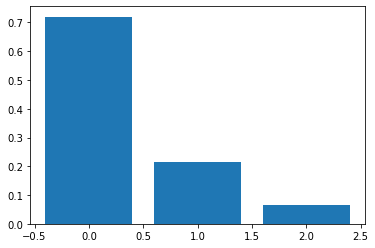

In [407]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

plt.bar(range(pca.n_components_), pca.explained_variance_ratio_)
plt.show()

[0.72006788 0.9346159  1.        ]


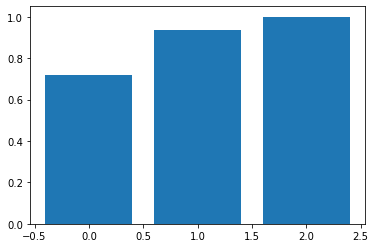

In [408]:
print(np.cumsum(pca.explained_variance_ratio_))

plt.bar(range(pca.n_components_), np.cumsum(pca.explained_variance_ratio_))
plt.show()

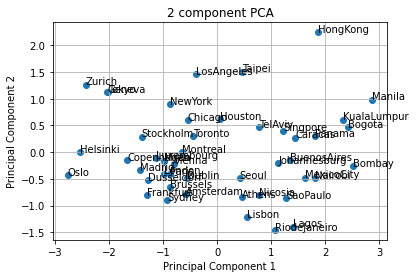

In [409]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
ax.grid()
 
ax.scatter(
    X_pca['PC1'], 
    X_pca['PC2'], 
)

for i, target in enumerate(X_pca.index):
    ax.annotate(target, (X_pca['PC1'].values[i], X_pca['PC2'].values[i]))

In [376]:
# wektory własne macierzy przekształcenia PCA
pca.components_

array([[ 0.48475659, -0.61785157, -0.61908843],
       [ 0.87462508,  0.34766783,  0.33787283],
       [-0.00648187,  0.70525635, -0.70892275]])

In [378]:
# wartości własne macierzy przekształcenia PCA
pca.singular_values_

array([9.96841853, 5.441289  , 3.00383187])

In [384]:
# macierz przekształcenia 'zmiany bazy' (rozkład oryginalnych zmiennych na składowe PCA)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
pd.DataFrame(loadings, index=['Work', 'Price', 'Salary'], columns=['PC1', 'PC2', 'PC3'])

,PC1,PC2,PC3
Work,0.720350,0.709443,-0.002902
Price,-0.918130,0.282007,0.315803
Salary,-0.919968,0.274062,-0.317445


### Zadanie 4: PCA na potrzeby regresji liniowej

W pliku `'../Dane/longley.csv'` znajdują się dane dotyczące makroekonomii Stanów Zjednoczonych (szczegółowe informacje można znaleźć tutaj https://stat.ethz.ch/R-manual/R-patched/library/datasets/html/longley.html)

In [347]:
df = pd.read_csv('../Dane/longley.csv', index_col=0)
df

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.0,234.289,235.6,159.0,107.608,1947,60.323
1948,88.5,259.426,232.5,145.6,108.632,1948,61.122
1949,88.2,258.054,368.2,161.6,109.773,1949,60.171
1950,89.5,284.599,335.1,165.0,110.929,1950,61.187
1951,96.2,328.975,209.9,309.9,112.075,1951,63.221
1952,98.1,346.999,193.2,359.4,113.270,1952,63.639
1953,99.0,365.385,187.0,354.7,115.094,1953,64.989
1954,100.0,363.112,357.8,335.0,116.219,1954,63.761
1955,101.2,397.469,290.4,304.8,117.388,1955,66.019
1956,104.6,419.180,282.2,285.7,118.734,1956,67.857


In [348]:
df.corr()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
GNP.deflator,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149,0.970899
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273,0.983552
Unemployed,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257,0.502498
Armed.Forces,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245,0.457307
Population,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953,0.960391
Year,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000,0.971329
Employed,0.970899,0.983552,0.502498,0.457307,0.960391,0.971329,1.000000


In [349]:
X, y = df.drop(['Employed', 'Year'], axis=1), df['Employed']
X

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population
1947,83.0,234.289,235.6,159.0,107.608
1948,88.5,259.426,232.5,145.6,108.632
1949,88.2,258.054,368.2,161.6,109.773
1950,89.5,284.599,335.1,165.0,110.929
1951,96.2,328.975,209.9,309.9,112.075
1952,98.1,346.999,193.2,359.4,113.270
1953,99.0,365.385,187.0,354.7,115.094
1954,100.0,363.112,357.8,335.0,116.219
1955,101.2,397.469,290.4,304.8,117.388
1956,104.6,419.180,282.2,285.7,118.734


In [350]:
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2,3,4
0,-1.787872,-1.594051,-0.925421,-1.508839,-1.457414
1,-1.261499,-1.332857,-0.959683,-1.707704,-1.305378
2,-1.290210,-1.347113,0.540111,-1.470253,-1.135969
3,-1.165795,-1.071288,0.174281,-1.419794,-0.964334
4,-0.524578,-0.610185,-1.209464,0.730628,-0.794184
5,-0.342740,-0.422901,-1.394037,1.465244,-0.616758
6,-0.256607,-0.231855,-1.462561,1.395492,-0.345943
7,-0.160902,-0.255473,0.425167,1.103130,-0.178910
8,-0.046058,0.101524,-0.319756,0.654940,-0.005345
9,0.279336,0.327119,-0.410385,0.371482,0.194500


In [351]:
pca = PCA()

X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca

,0,1,2,3,4
0,3.204945,-0.776652,-0.301445,0.169601,-0.006442
1,2.773855,-0.877361,-0.653574,-0.126642,-0.043745
2,2.104761,-1.590765,0.512299,0.008744,-0.008121
3,1.929308,-1.318500,0.128822,0.059864,0.044926
4,1.279159,1.276178,0.023850,-0.096544,0.009416
5,0.893386,1.985051,0.162056,-0.045618,-0.008826
6,0.649108,1.973110,-0.065788,0.073366,-0.039403
7,-0.098944,0.612634,1.063566,0.065940,-0.014047
8,-0.059434,0.716200,0.111650,0.099272,0.069654
9,-0.352178,0.565773,-0.289121,-0.022901,0.032194


In [352]:
pca.explained_variance_ratio_

array([7.21933818e-01, 2.35067974e-01, 3.98310724e-02, 2.97644915e-03,
       1.90686838e-04])

In [353]:
np.cumsum(pca.explained_variance_ratio_)

array([0.72193382, 0.95700179, 0.99683286, 0.99980931, 1.        ])

In [354]:
pca = PCA(n_components=3)

X_pca_r = pca.fit_transform(X)
X_pca_r = pd.DataFrame(X_pca_r)

X_pca_r

,0,1,2
0,3.204945,-0.776652,-0.301445
1,2.773855,-0.877361,-0.653574
2,2.104761,-1.590765,0.512299
3,1.929308,-1.318500,0.128822
4,1.279159,1.276178,0.023850
5,0.893386,1.985051,0.162056
6,0.649108,1.973110,-0.065788
7,-0.098944,0.612634,1.063566
8,-0.059434,0.716200,0.111650
9,-0.352178,0.565773,-0.289121


#### Połączenie regresji liniowej i analizy składowych głównych - Principal Component Regression (PCR)

In [358]:
# regresja liniowa dla pełnego modelu (samo przekształcenie PCA nie redukuje informacji!)

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
cross_val_score(lm, X_pca, y, scoring='neg_mean_squared_error').mean()

-2.6811458038288363

In [359]:
# model z PCA do redukcji wymiarowości - redukcja błędu średniokwadratowego, lepsze dopasowanie

lm = LinearRegression()
cross_val_score(lm, X_pca_r, y, scoring='neg_mean_squared_error').mean()

-2.1215120742986